# MNIST Digit Classification using Naive Bayes

This notebook demonstrates how to classify handwritten digits using two variants of the Naive Bayes algorithm:

- Gaussian Naive Bayes
- Multinomial Naive Bayes

I use the MNIST dataset, which is a classic benchmark for evaluating classification algorithms.

## Objectives:
- Understand differences between Gaussian and Multinomial NB.
- Explore preprocessing effects.
- Evaluate and visualize model performance.


In [1]:
# Imports and dataset loading

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the MNIST dataset:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Exploratory Data Analysis

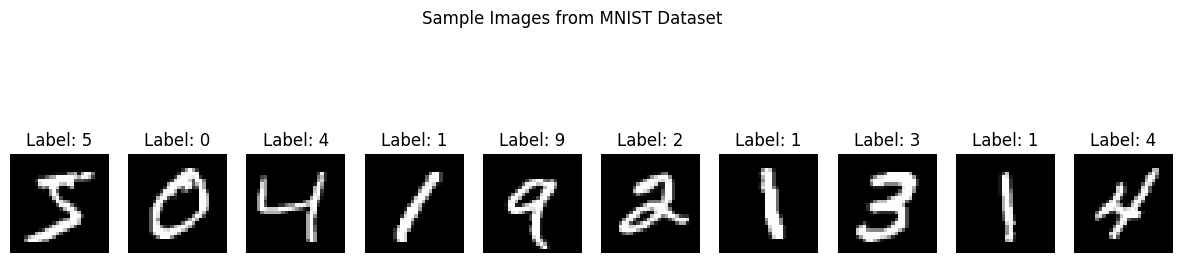

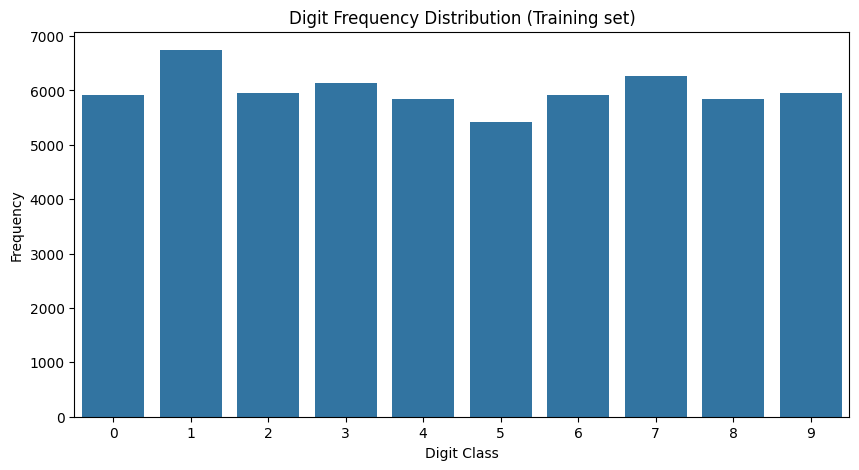

In [3]:
# Visualizing the digits from the dataset:

fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {y_train[i]}')
plt.suptitle('Sample Images from MNIST Dataset')
plt.show()

# Class distribution in training set:

plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title('Digit Frequency Distribution (Training set)')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Data Pre-processing

# Normalizing pixel values (0-1):

x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to vectors (for classifiers expecting 2D input):

train_2d = x_train.reshape(x_train.shape[0], -1)
test_2d = x_test.reshape(x_test.shape[0], -1)

## Gaussian NB

In [6]:
# Gaussian Naive Bayes classifier:

gnb = GaussianNB()
gnb.fit(train_2d, y_train)
y_pred_gnb = gnb.predict(test_2d)

# Gaussian NB results:

print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy: {accuracy_gnb:.2f}")

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

Gaussian NB Accuracy: 0.56


## Multinomial NB

In [7]:
# Multinomial Naive Bayes classifier:

mnb = MultinomialNB()
mnb.fit(train_2d, y_train)
y_pred_mnb = mnb.predict(test_2d)

# Multinomial NB results:

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial NB Accuracy: {accuracy_mnb:.2f}")

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       980
           1       0.45      1.00      0.62      1135
           2       0.93      0.62      0.75      1032
           3       0.56      0.83      0.67      1010
           4       0.92      0.49      0.64       982
           5       1.00      0.01      0.01       892
           6       0.90      0.84      0.87       958
           7       0.70      0.87      0.78      1028
           8       0.76      0.41      0.53       974
           9       0.64      0.66      0.65      1009

    accuracy                           0.68     10000
   macro avg       0.78      0.67      0.64     10000
weighted avg       0.77      0.68      0.65     10000

Multinomial NB Accuracy: 0.68


Visualization of the Results

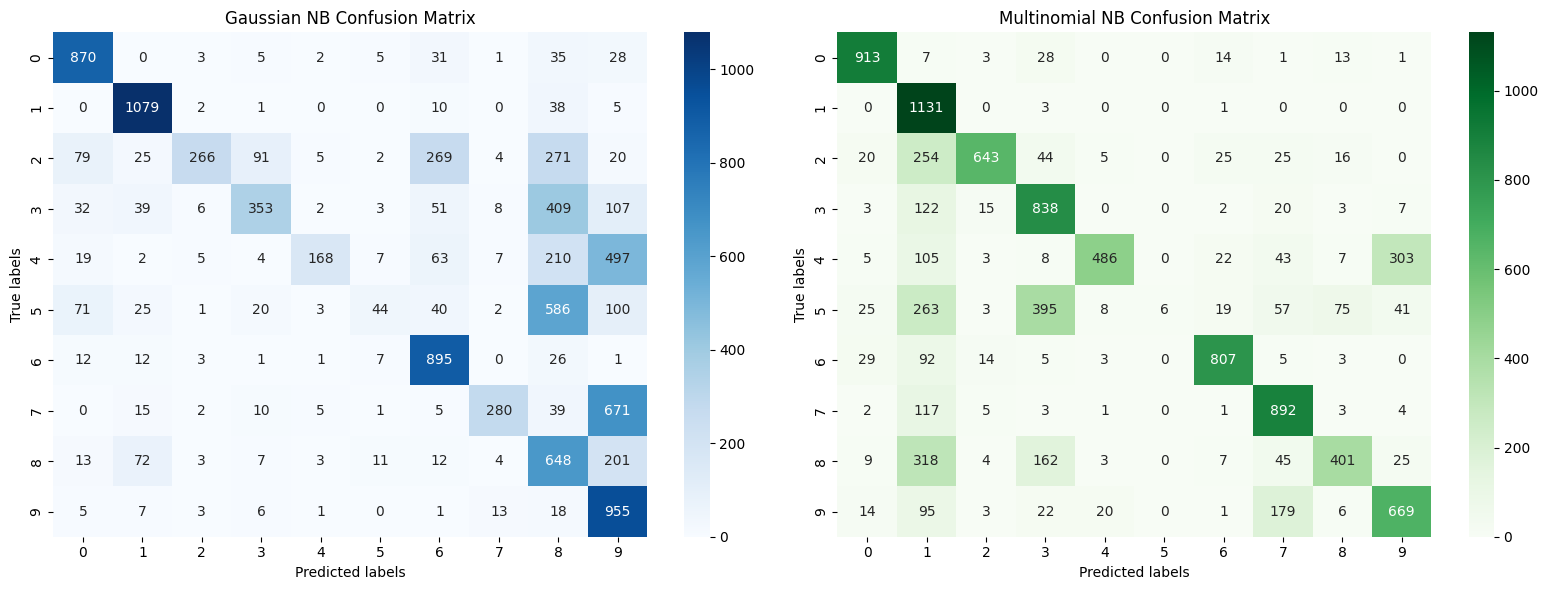

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gaussian NB confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Gaussian NB Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

# Multinomial NB confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Multinomial NB Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

plt.tight_layout()
plt.show()

## Discussion & Observations:

Multinomial Naive Bayes significantly outperforms Gaussian Naive Bayes on the MNIST dataset.

**Reasons:**
- MNIST consists of discrete pixel intensity values (despite normalization), which fits better with the Multinomial model assumptions.
- Gaussian NB assumes independence and Gaussian distribution of features, which isn't ideal for pixel data due to pixel correlation and sparse distribution.

### Insights:
- Multinomial NB should be preferred for image-like discrete data.
- Feature engineering or dimensionality reduction techniques (PCA or CNNs) may help Gaussian NB perform better, but typically other methods (like CNN) are preferred for image data.